# PyParticleBunch Plotting Functions
### A place to implement plotting of the ParticleBunch

---
## Don't forget to create your own branch before editing / pushing this notebook!

---
## Introduction:
- [x] Create a PyParticleBunch object - this is a computational representation of a distribution of particles (i.e. a bunch)
- [x] Use PyParticleBunch access functions to get particle co-ordinates
- [x] Create plots using the PyParticleBunch particle co-ordinates

## Plots to make:
- [x] 1D histograms (aka beam profile)
- [ ] 2D histograms -> heatmaps/contour/density
- [ ] 2D scatter
- [ ] 3D scatter
- [ ] GIFs from files
- [ ] Widgets to change axes limits?

## Functions to make:
- [ ] Plot 1D histogram
- [ ] Plot 2D heatmap (histogram)
- [ ] Plot 2D heatmap with 1D histogram projections
- [ ] Plot 3D scatter
---
# Function requirements:
- [ ] Take PyParticleBunch as argument
- [ ] Use PyParticleBunch access functions to get data
- [ ] Make a pretty plot (axes labels, nice axes limits, title, etc)
- [ ] Give the option to save the plot to a .png file (and allow the user to provide the filename)

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#### This code runs the PyParticleBunch library (it's equivalent to `import PyParticleBunch` - which won't work until this module is complete and released into the public domain)

In [2]:
if os.name=='nt': # Windows
    %run ../../PyParticleBunch/PyParticleBunch.py 
else: # Linux
    %run '../../PyParticleBunch/PyParticleBunch.py' 

In [3]:
mean = 0.
std_dev = 0.006
min_lim = -0.02
max_lim = 0.02
gaussian_bunch = ParticleBunch.Gaussian_2D_limits(int(1E6), mean, std_dev, min_lim, max_lim, True)

In [4]:
x_dat = gaussian_bunch.get_x_array()
px_dat = gaussian_bunch.get_px_array()
y_dat = gaussian_bunch.get_y_array()
py_dat = gaussian_bunch.get_py_array()
t_dat = gaussian_bunch.get_t_array()
pt_dat = gaussian_bunch.get_pt_array()

In [34]:
def plot_bunch(ParticleBunch, flag, title):
    
    fig=plt.figure(figsize=(4, 4), dpi= 200, facecolor='w', edgecolor='k');
    
    if flag == 'x':
        data = gaussian_bunch.get_x_array()
        plt.xlabel('x [m]');
    elif flag == 'y':
        data = gaussian_bunch.get_y_array() 
        plt.xlabel('y [m]');

    plt.hist(data,100)
    plt.grid(which='both', ls=':', lw=0.5)
    plt.ylabel('Counts [arbitrary]');
    plt.suptitle(title)

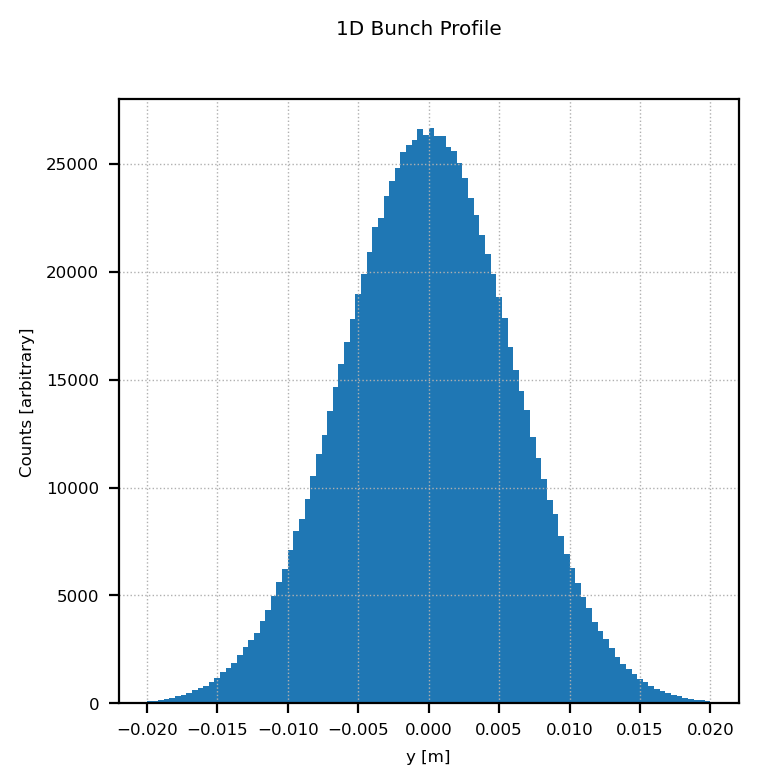

In [35]:
plot_bunch(gaussian_bunch, 'y', "1D Bunch Profile")

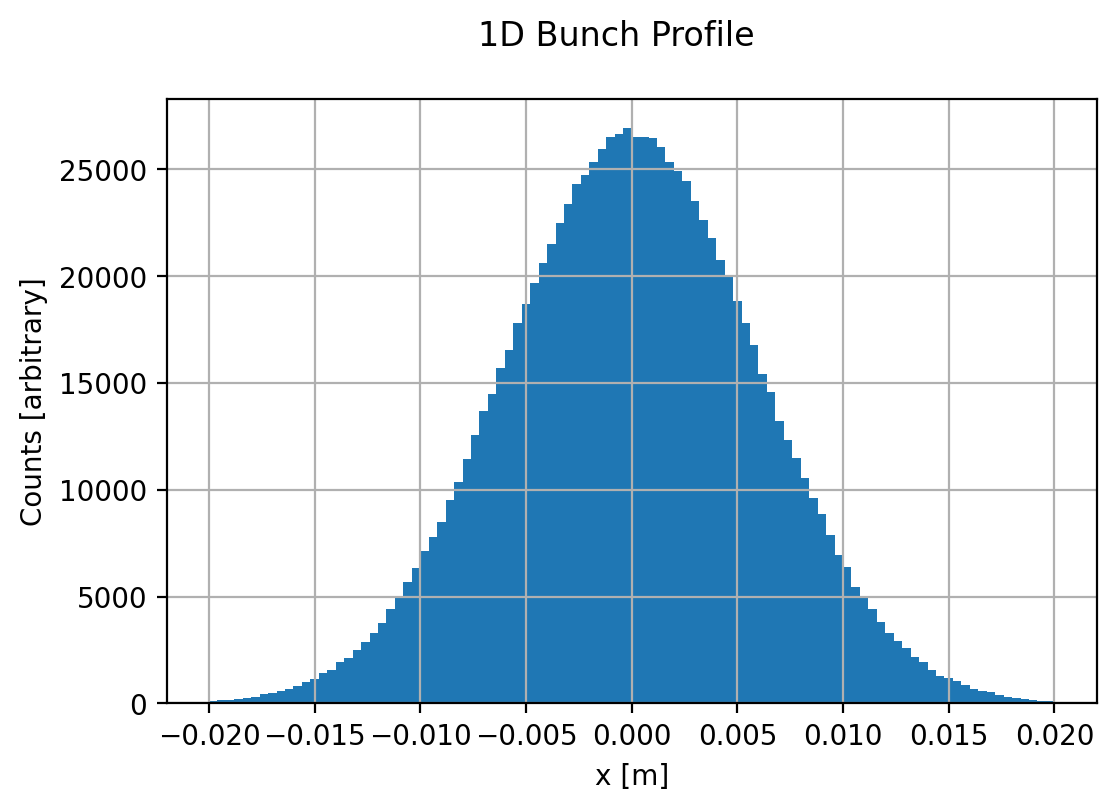

In [5]:
fig=plt.figure(figsize=(6, 4), dpi= 200, facecolor='w', edgecolor='k');

plt.xlabel('x [m]');
plt.ylabel('Counts [arbitrary]');
plt.suptitle("1D Bunch Profile")

count, bins, ignored = plt.hist(x_dat, 100)
plt.grid()

## Use gridspec to combine the 1D and 2D histograms

In [6]:
import matplotlib.gridspec as gridspec

In [7]:
x_max = px_max = y_max = py_max = t_max = pt_max = x_min = px_min = y_min = py_min = t_min = pt_min = 0.

bin_size_x = 128
bin_size_y = 128

In [8]:
if np.max(x_dat) > x_max : x_max = np.max(x_dat)            
if np.max(px_dat) > px_max : px_max = np.max(px_dat)            
if np.max(y_dat) > y_max : y_max = np.max(y_dat)            
if np.max(px_dat) > py_max : py_max = np.max(px_dat)            
if np.max(t_dat) > t_max : t_max = np.max(t_dat)            
if np.max(pt_dat) > pt_max : pt_max = np.max(pt_dat)
    
if np.min(x_dat) < x_min : x_min = np.min(x_dat)            
if np.min(px_dat) < px_min : px_min = np.min(px_dat)            
if np.min(y_dat) < y_min : y_min = np.min(y_dat)            
if np.min(py_dat) < py_min : py_min = np.min(py_dat)            
if np.min(t_dat) < t_min : t_min = np.min(t_dat)            
if np.min(pt_dat) < pt_min : pt_min = np.min(pt_dat)

In [9]:
plt.rcParams['figure.figsize'] = [4.0, 4.0]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['font.size'] = 6
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['legend.handlelength'] = 5

plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams['lines.markersize'] = 0.25

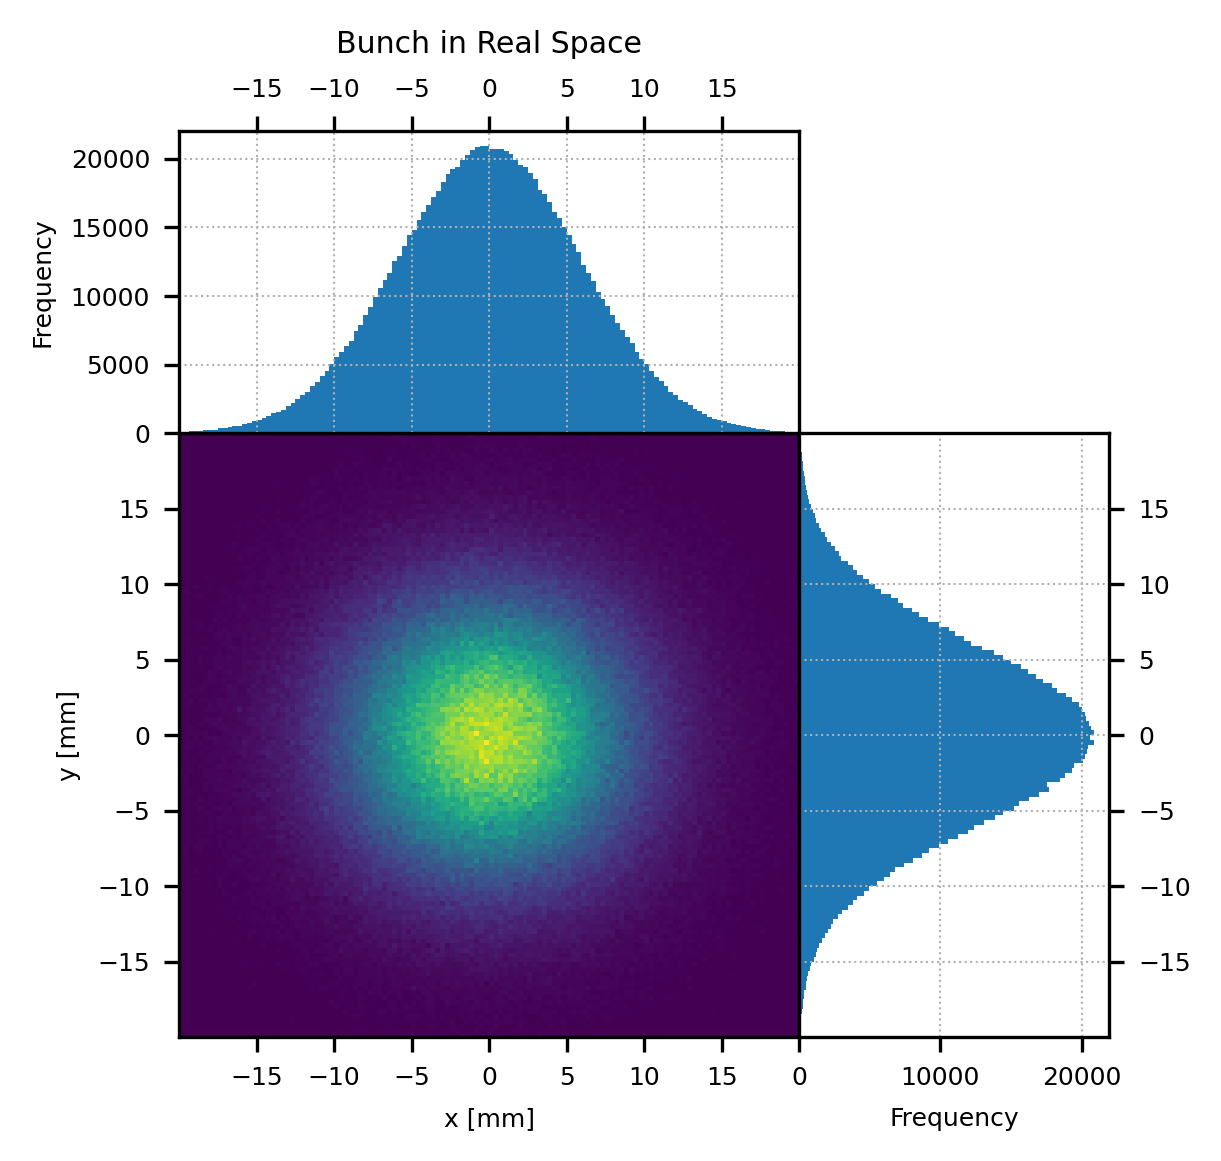

In [11]:
fig3 = plt.figure(1)
gridspec.GridSpec(3,3) # Create grid to resize subplots
fig3.subplots_adjust(hspace = 0) # Horizontal spacing between subplots
fig3.subplots_adjust(wspace = 0) # Vertical spacing between subplots

tit1 = 'Bunch in Real Space'
multi = 1000

plt.subplot2grid((3,3), (1,0), colspan=2, rowspan=2)
plt.hist2d(x_dat*multi, y_dat*multi, bin_size_x, range=[[x_min*multi, x_max*multi],[y_min*multi, y_max*multi]])
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
axis_main = plt.gca()
axis_main_ylim = axis_main.axes.get_ylim()
axis_main_xlim = axis_main.axes.get_xlim()

plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=1)
plt.hist(x_dat*multi, bins = bin_size_x,  range = [x_min*multi, x_max*multi], density=False)
plt.grid(which='both', ls=':', lw=0.5)
plt.ylabel('Frequency')
axis_top = plt.gca()
axis_top.axes.set_xlim(axis_main_xlim)
axis_top.xaxis.set_ticks_position("top")
plt.title(tit1)

plt.subplot2grid((3,3), (1,2), colspan=1, rowspan=2)
plt.hist(y_dat*multi, bins = bin_size_y,  range = [y_min*multi, y_max*multi], density=False, orientation=u'horizontal')
plt.grid(which='both', ls=':', lw=0.5)
plt.xlabel('Frequency')
axis_right = plt.gca()
axis_right.axes.set_ylim(axis_main_ylim)
axis_right.yaxis.set_ticks_position("right")

figname = 'test.png'
#fig3.savefig(figname);
